<a href="https://colab.research.google.com/github/seunghy1468/Sparta_Coding_Machine_Learning/blob/main/2%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_01_%EC%9D%B4%EC%A7%84_%EB%85%BC%EB%A6%AC_%ED%9A%8C%EA%B7%80%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 다운로드

타이타닉 데이터셋: https://www.kaggle.com/heptapod/titanic

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'kairess' # username
os.environ['KAGGLE_KEY'] = '7d0443b2dfffc57c94271fd797511896' # key

In [ ]:
!kaggle datasets download -d heptapod/titanic

  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 10.1MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: train_and_test2.csv     


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터셋 로드

In [ ]:
df = pd.read_csv('train_and_test2.csv')

df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


# 사용하는 칼럼만 추출

In [ ]:
df = pd.read_csv('train_and_test2.csv', usecols=[
  'Age', # 나이
  'Fare', # 승차 요금
  'Sex', # 성별
  'sibsp', # 타이타닉에 탑승한 형제자매, 배우자의 수
  'Parch', # 타이타니게 탑승한 부모, 자식의 수
  'Pclass', # 티켓 등급 (1, 2, 3등석)
  'Embarked', # 탑승국
  '2urvived' # 생존 여부 (0: 사망, 1: 생존)
])

df.head(5)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


# 간단하게 데이터셋 미리보기

성별에 따른 생존자 수

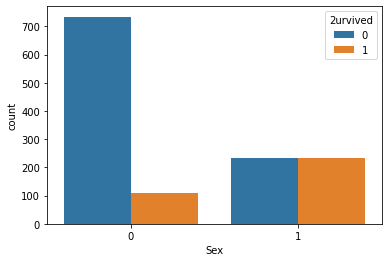

In [ ]:
sns.countplot(x='Sex', hue='2urvived', data=df)

# 생존여부 클래스의 개수 확인

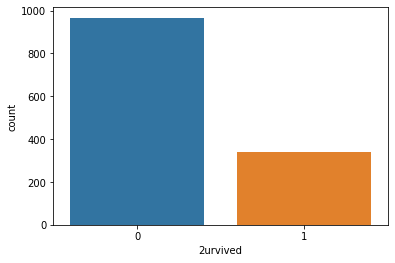

In [ ]:
sns.countplot(x=df['2urvived'])

# 전처리 (Preprocessing)

## 비어있는 행 확인

1. 비어있는 값(null 또는 na)이 있는지 확인하고,
2. 비어있는 값을 포함한 행을 제거한다

In [ ]:
print(df.isnull().sum())

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    2
2urvived    0
dtype: int64


In [ ]:
print(len(df))

df = df.dropna()

print(len(df))

1309
1307


## X, y 데이터 분할

In [ ]:
x_data = df.drop(columns=['2urvived'], axis=1)
x_data = x_data.astype(np.float32)

x_data.head(5)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,22.0,7.250000,0.0,1.0,0.0,3.0,2.0
1,38.0,71.283302,1.0,1.0,0.0,1.0,0.0
2,26.0,7.925000,1.0,0.0,0.0,3.0,2.0
3,35.0,53.099998,1.0,1.0,0.0,1.0,2.0
4,35.0,8.050000,0.0,0.0,0.0,3.0,2.0


In [ ]:
y_data = df[['2urvived']]
y_data = y_data.astype(np.float32)

y_data.head(5)

,2urvived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


## 표준화 (Standardization)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

z = (x - u) / s

z = (x - 평균) / 표준편차

In [ ]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)

print(x_data.values[0])
print(x_data_scaled[0])

[22.    7.25  0.    1.    0.    3.    2.  ]
[-0.58026063 -0.5018386  -0.74189967  0.48027173 -0.44540733  0.8404475
  0.6229398 ]


# 학습/검증 데이터 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(1045, 7) (262, 7)
(1045, 1) (262, 1)


# 모델 학습

In [ ]:
model = Sequential([
  Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20 # epochs 복수형으로 쓰기!
)

Epoch 1/20
33/33 [==============================] - 1s 14ms/step - loss: 1.4387 - acc: 0.5671 - val_loss: 0.6340 - val_acc: 0.7290
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 0.6620 - acc: 0.6820 - val_loss: 0.5659 - val_acc: 0.7176
Epoch 3/20
33/33 [==============================] - 0s 2ms/step - loss: 0.6135 - acc: 0.6996 - val_loss: 0.5863 - val_acc: 0.7176
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.5858 - acc: 0.7097 - val_loss: 0.5198 - val_acc: 0.7901
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.5483 - acc: 0.7378 - val_loss: 0.4759 - val_acc: 0.7863
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.5762 - acc: 0.7348 - val_loss: 0.5827 - val_acc: 0.7595
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.5302 - acc: 0.7514 - val_loss: 0.4506 - val_acc: 0.7939
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5047 - acc: 0.7